In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import os
from tqdm import tqdm
import json
import time
import random
import pickle

In [68]:
import keras

In [69]:

from keras.models import Model, Sequential
from keras.layers import Dense, Input,Flatten,BatchNormalization,Conv2D,MaxPooling2D,BatchNormalization
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed

model=Sequential()
model.add(Input(shape=(None,128,96,1)))
model.add(TimeDistributed(Conv2D(filters=128,kernel_size=(5,5),padding="valid")))
model.add(TimeDistributed(MaxPooling2D((3,3),strides=(2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Conv2D(filters=128,kernel_size=(5,5),padding="valid")))
model.add(TimeDistributed(MaxPooling2D((3,3),strides=(2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Conv2D(filters=64,kernel_size=(3,3),padding="same")))
model.add(TimeDistributed(MaxPooling2D((3,3),strides=(2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Conv2D(filters=32,kernel_size=(3,3),padding="same")))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(512,activation="sigmoid",return_sequences=True))
model.add(LSTM(256,activation="sigmoid",return_sequences=True))
model.add(LSTM(128,activation="sigmoid"))
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(50,activation="softmax"))

In [72]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"]) 

In [40]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_13 (TimeDis (None, None, 124, 92, 128 3328      
_________________________________________________________________
time_distributed_14 (TimeDis (None, None, 61, 45, 128) 0         
_________________________________________________________________
time_distributed_15 (TimeDis (None, None, 61, 45, 128) 512       
_________________________________________________________________
time_distributed_16 (TimeDis (None, None, 57, 41, 128) 409728    
_________________________________________________________________
time_distributed_17 (TimeDis (None, None, 28, 20, 128) 0         
_________________________________________________________________
time_distributed_18 (TimeDis (None, None, 28, 20, 128) 512       
_________________________________________________________________
time_distributed_19 (TimeDis (None, None, 28, 20, 64) 

In [41]:
ed=np.zeros((50,50))


In [42]:
for i in range(ed.shape[0]):
    ed[i][i]=1

In [43]:
ed=pd.DataFrame(ed)

In [44]:
ed.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df=pd.read_csv("E:\capstone\code\WLASL-master\WLASL-master\start_kit\data.csv")
df.head()

,gloss,video_id,xmin,ymin,xmax,ymax,fps,frame_end,frame_start,instance_id,signer_id,source,split,url,variation_id
0,book,69241,385,37,885,720,25.0,-1,1,0,118,aslbrick,train,http://aslbricks.org/New/ASL-Videos/book.mp4,0
1,book,65225,190,25,489,370,25.0,-1,1,1,90,aslsignbank,train,https://aslsignbank.haskins.yale.edu/dictionar...,0
2,book,68011,262,1,652,480,25.0,-1,1,2,110,valencia-asl,train,https://www.youtube.com/watch?v=0UsjUE-TXns,0
3,book,68208,123,19,516,358,25.0,60,1,3,113,lillybauer,train,https://www.youtube.com/watch?v=1QOYOZ3g-aY,0
4,book,68012,95,0,1180,720,25.0,-1,1,4,109,valencia-asl,train,https://www.youtube.com/watch?v=aGtIHKEdCds,0


In [46]:
words=df.gloss.unique()

In [47]:
len(words)

2000

In [48]:
ed['gloss']=words[:50]

In [49]:
ed.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,gloss
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,book
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drink
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,computer
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,before
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chair


In [52]:
x_train=[]
x_test=[]
x_val=[]
y_train=[]
y_test=[]
y_val=[]
y_words_train=[]
y_words_test=[]
y_words_val=[]
K=5
attempts=10


for word in tqdm(words[:50]): 

    for split in os.listdir(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\preprocessed_vid_by_word_48_64 16.09.58\{}'.format(word)):
        if split==".DS_Store" or split=='._.DS_Store':
            continue
        try:
            for v in os.listdir(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\preprocessed_vid_by_word_48_64 16.09.58\{}\{}'.format(word,split)):
                y_ind=ed[ed['gloss']==word].values[:,:-1].reshape((1,50))
            
                x_ind=np.load(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\preprocessed_vid_by_word_48_64 16.09.58\{}\{}\{}'.format(word,split,v))
                image_seg=[]
                start=x_ind.shape[0]*.2
                end=x_ind.shape[0]*.8
                frame_no=0
                for frame1 in x_ind:
                        frame_no=frame_no+1
                        if(frame_no<=start or frame_no>=end):
                            continue
                        frame=cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
                        vectorized = frame.reshape((-1,3))
                        vectorized = np.float32(vectorized)
                        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
                        ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
                        center = np.uint8(center)
                        res = center[label.flatten()]
                        result_image = res.reshape((frame.shape))
                        result_image=cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
                        image_seg.append(result_image.reshape((128, 96,1)))
                image_seg=np.asarray(image_seg)
                if(split=="train"):
                    
                    x_train.append(image_seg)
                    y_train.append(y_ind)
                    y_words_train.append(word)
                elif(split=="test"):
                    x_test.append(image_seg)
                    y_test.append(y_ind)
                    y_words_test.append(word)
                else:
                    x_val.append(image_seg)
                    y_val.append(y_ind)
                    y_words_val.append(word)
                
        except Exception as e:
            print("Error:" ,e ,"file",i)
        

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [31:38<00:00, 37.97s/it]


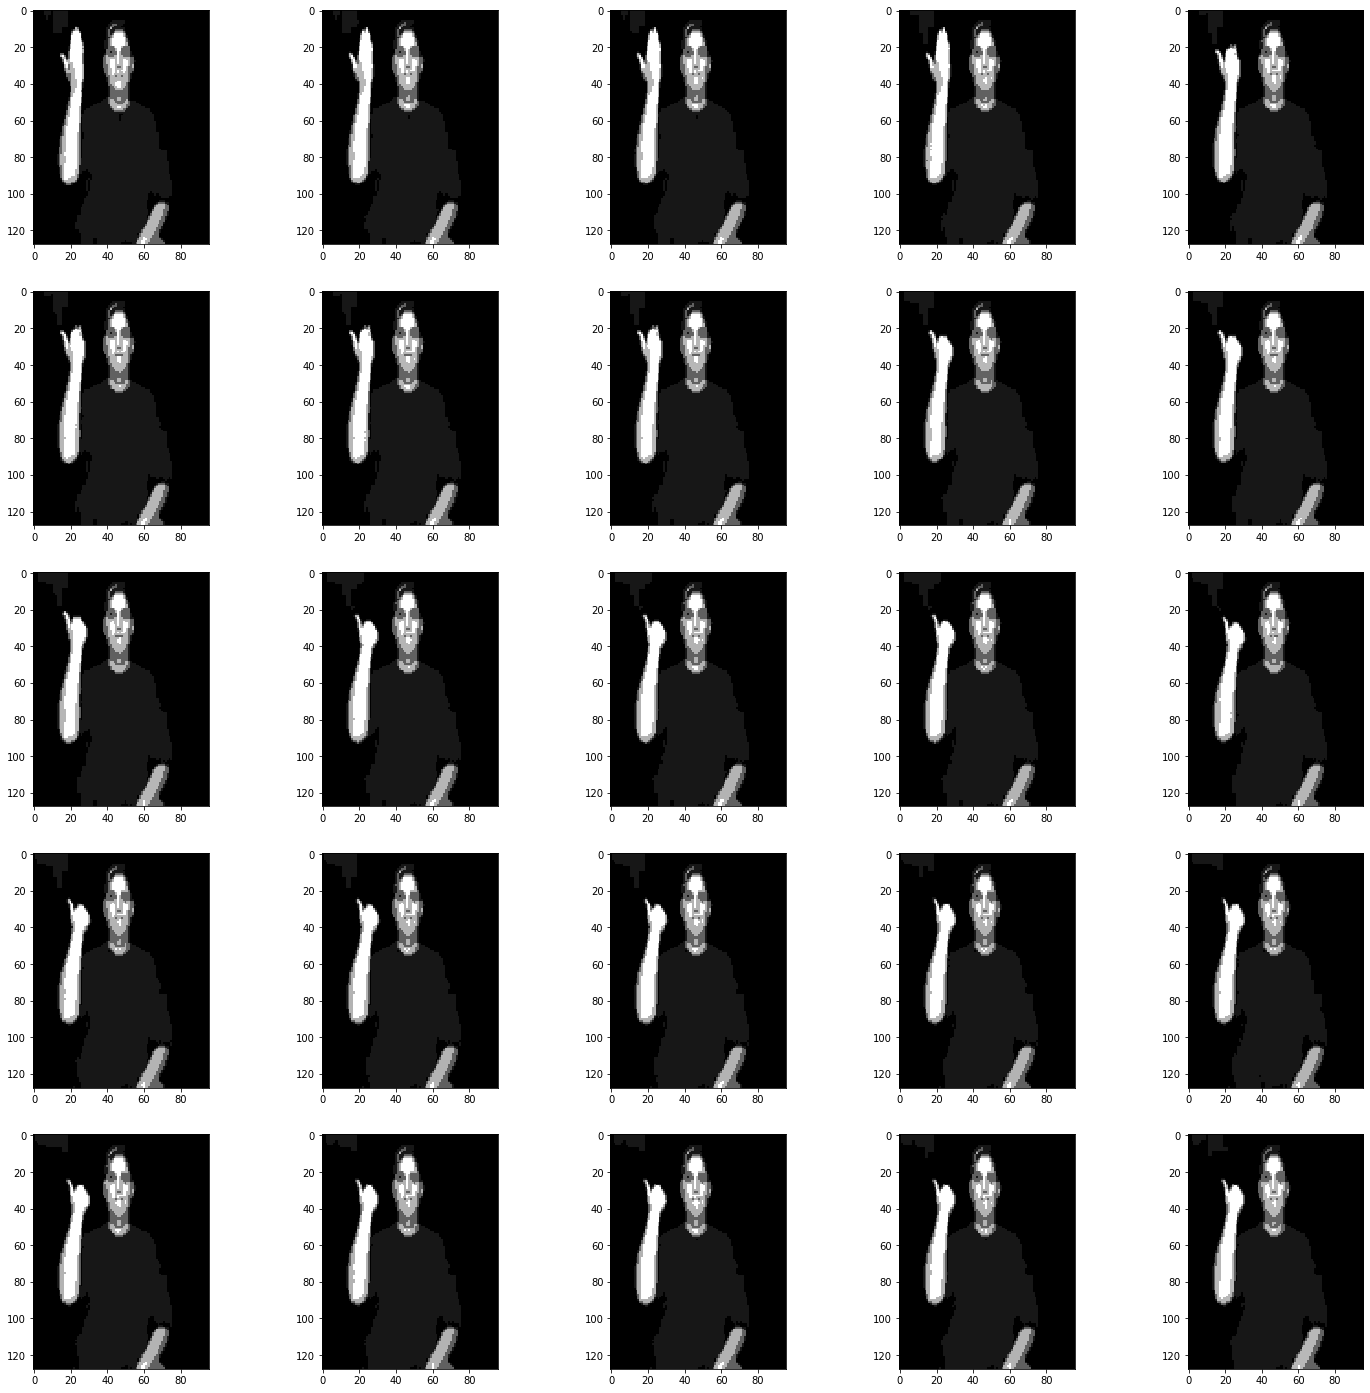

In [57]:
plt.figure(figsize=(25,25))
for i in range(min(25,x_train[50].shape[0])):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[50][i].reshape((128,96)),cmap="gray")


In [58]:
len(x_train),len(y_train),len(x_test),len(y_test),len(x_val),len(y_val)

(675, 675, 132, 132, 158, 158)

In [59]:
x_train=np.array(x_train)
x_test=np.array(x_test)
x_val=np.array(x_val)
y_train=np.array(y_train)
y_test=np.array(y_test)
y_val=np.array(y_val)

In [60]:
x_train=x_train/255
x_test=x_test/255
x_val=x_val/255

In [74]:
from sklearn.utils import shuffle
x_train, y_train,y_words_train = shuffle(x_train, y_train,y_words_train,random_state=0)

In [77]:
temp=[]
for i in x_train:
    temp.append(i.shape[0])

In [81]:
temp=pd.DataFrame(temp)

In [88]:
temp.columns

RangeIndex(start=0, stop=1, step=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C681A75AC8>]],
      dtype=object)

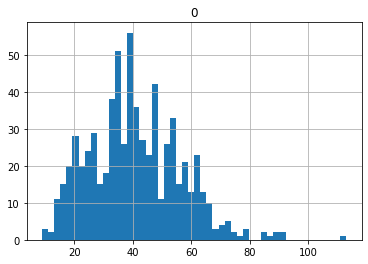

In [116]:
temp.hist(bins=50)

In [128]:
c=0
for i in temp.groupby([0]).size():
    if i<10:
        c=c+i
c

173

  0%|                                                                                          | 0/674 [00:00<?, ?it/s]

epoch 0
1/1 [==============================] - 0s 2ms/step - loss: 5.6293 - accuracy: 0.0000e+00


  0%|                                                                                  | 1/674 [00:04<54:04,  4.82s/it]

prev : drink now : drink word : cousin
1/1 [==============================] - 0s 3ms/step - loss: 5.8921 - accuracy: 0.0000e+00


  0%|▏                                                                                 | 2/674 [00:09<53:48,  4.80s/it]

prev : drink now : drink word : study
1/1 [==============================] - 0s 2ms/step - loss: 6.2575 - accuracy: 0.0000e+00


  0%|▎                                                                               | 3/674 [00:17<1:03:23,  5.67s/it]

prev : mother now : mother word : hot
1/1 [==============================] - 0s 2ms/step - loss: 7.3182 - accuracy: 0.0000e+00


  1%|▍                                                                               | 4/674 [00:23<1:03:30,  5.69s/it]

prev : mother now : mother word : can
1/1 [==============================] - 0s 4ms/step - loss: 6.5382 - accuracy: 0.0000e+00


  1%|▌                                                                                 | 5/674 [00:26<55:48,  5.00s/it]

prev : mother now : mother word : later
1/1 [==============================] - 0s 2ms/step - loss: 6.7155 - accuracy: 0.0000e+00


  1%|▋                                                                                 | 6/674 [00:31<55:21,  4.97s/it]

prev : mother now : mother word : deaf
1/1 [==============================] - 0s 2ms/step - loss: 5.4023 - accuracy: 0.0000e+00


  1%|▊                                                                                 | 7/674 [00:37<58:55,  5.30s/it]

prev : no now : no word : what
1/1 [==============================] - 0s 3ms/step - loss: 7.2697 - accuracy: 0.0000e+00


  1%|▉                                                                                 | 8/674 [00:40<51:48,  4.67s/it]

prev : no now : no word : man
1/1 [==============================] - 0s 2ms/step - loss: 6.9429 - accuracy: 0.0000e+00


  1%|█                                                                                 | 9/674 [00:46<54:46,  4.94s/it]

prev : no now : no word : book
1/1 [==============================] - 0s 3ms/step - loss: 7.4327 - accuracy: 0.0000e+00


  1%|█▏                                                                               | 10/674 [00:49<49:24,  4.46s/it]

prev : no now : no word : walk
1/1 [==============================] - 0s 3ms/step - loss: 3.7174 - accuracy: 0.0000e+00


  2%|█▎                                                                               | 11/674 [00:53<48:26,  4.38s/it]

prev : no now : no word : later
1/1 [==============================] - 0s 3ms/step - loss: 1.7015 - accuracy: 1.0000


  2%|█▍                                                                               | 12/674 [00:58<51:00,  4.62s/it]

prev : no now : no word : no
1/1 [==============================] - 0s 3ms/step - loss: 5.9526 - accuracy: 0.0000e+00


  2%|█▌                                                                               | 13/674 [01:02<47:22,  4.30s/it]

prev : no now : no word : hat
1/1 [==============================] - 0s 2ms/step - loss: 6.9371 - accuracy: 0.0000e+00


  2%|█▋                                                                               | 14/674 [01:07<48:54,  4.45s/it]

prev : no now : no word : computer
1/1 [==============================] - 0s 3ms/step - loss: 6.9797 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 15/674 [01:16<1:04:35,  5.88s/it]

prev : no now : no word : hearing
1/1 [==============================] - 0s 4ms/step - loss: 5.3599 - accuracy: 0.0000e+00


  2%|█▉                                                                             | 16/674 [01:23<1:07:13,  6.13s/it]

prev : no now : no word : white
1/1 [==============================] - 0s 2ms/step - loss: 5.5666 - accuracy: 0.0000e+00


  3%|█▉                                                                             | 17/674 [01:27<1:01:26,  5.61s/it]

prev : no now : no word : black
1/1 [==============================] - 0s 3ms/step - loss: 5.8768 - accuracy: 0.0000e+00


  3%|██                                                                             | 18/674 [01:34<1:04:28,  5.90s/it]

prev : no now : no word : dog
1/1 [==============================] - 0s 3ms/step - loss: 5.8593 - accuracy: 0.0000e+00


  3%|██▎                                                                              | 19/674 [01:37<54:38,  5.01s/it]

prev : later now : later word : kiss
1/1 [==============================] - 0s 2ms/step - loss: 5.1641 - accuracy: 0.0000e+00


  3%|██▍                                                                              | 20/674 [01:42<54:46,  5.03s/it]

prev : later now : later word : year
1/1 [==============================] - 0s 3ms/step - loss: 3.5130 - accuracy: 0.0000e+00


  3%|██▌                                                                              | 21/674 [01:47<55:02,  5.06s/it]

prev : later now : later word : walk
1/1 [==============================] - 0s 2ms/step - loss: 5.5568 - accuracy: 0.0000e+00


  3%|██▋                                                                              | 22/674 [01:52<56:00,  5.15s/it]

prev : later now : later word : candy
1/1 [==============================] - 0s 3ms/step - loss: 4.5999 - accuracy: 0.0000e+00


  3%|██▊                                                                              | 23/674 [01:56<53:16,  4.91s/it]

prev : later now : later word : yes
1/1 [==============================] - 0s 3ms/step - loss: 4.6117 - accuracy: 0.0000e+00


  4%|██▉                                                                              | 24/674 [02:00<49:17,  4.55s/it]

prev : later now : later word : graduate
1/1 [==============================] - 0s 3ms/step - loss: 4.1850 - accuracy: 0.0000e+00


  4%|███                                                                              | 25/674 [02:02<40:24,  3.74s/it]

prev : later now : later word : yes
1/1 [==============================] - 0s 2ms/step - loss: 3.1932 - accuracy: 0.0000e+00


  4%|███                                                                              | 26/674 [02:06<39:51,  3.69s/it]

prev : later now : later word : can
1/1 [==============================] - 0s 3ms/step - loss: 3.8982 - accuracy: 0.0000e+00


  4%|███▏                                                                             | 27/674 [02:09<39:39,  3.68s/it]

prev : later now : later word : yes
1/1 [==============================] - 0s 3ms/step - loss: 3.2153 - accuracy: 0.0000e+00


  4%|███▎                                                                             | 28/674 [02:13<40:55,  3.80s/it]

prev : later now : later word : no
1/1 [==============================] - 0s 2ms/step - loss: 4.2095 - accuracy: 0.0000e+00


  4%|███▍                                                                             | 29/674 [02:20<50:30,  4.70s/it]

prev : later now : later word : like
1/1 [==============================] - 0s 2ms/step - loss: 4.0859 - accuracy: 0.0000e+00


  4%|███▌                                                                             | 30/674 [02:28<59:41,  5.56s/it]

prev : no now : no word : candy
1/1 [==============================] - 0s 2ms/step - loss: 3.4321 - accuracy: 0.0000e+00


  5%|███▋                                                                           | 31/674 [02:34<1:02:23,  5.82s/it]

prev : no now : no word : study
1/1 [==============================] - 0s 2ms/step - loss: 4.6190 - accuracy: 0.0000e+00


  5%|███▊                                                                             | 32/674 [02:38<55:26,  5.18s/it]

prev : walk now : walk word : woman
1/1 [==============================] - 0s 3ms/step - loss: 3.6511 - accuracy: 0.0000e+00


  5%|███▉                                                                             | 33/674 [02:43<56:46,  5.31s/it]

prev : walk now : walk word : year
1/1 [==============================] - 0s 3ms/step - loss: 4.6492 - accuracy: 0.0000e+00


  5%|████                                                                             | 34/674 [02:47<51:32,  4.83s/it]

prev : walk now : walk word : blue
1/1 [==============================] - 0s 2ms/step - loss: 3.5735 - accuracy: 0.0000e+00


  5%|████▏                                                                            | 35/674 [02:54<57:14,  5.38s/it]

prev : walk now : walk word : book
1/1 [==============================] - 0s 2ms/step - loss: 3.5646 - accuracy: 0.0000e+00


  5%|████▎                                                                            | 36/674 [02:59<57:17,  5.39s/it]

prev : walk now : walk word : book
1/1 [==============================] - 0s 4ms/step - loss: 3.8281 - accuracy: 0.0000e+00


  5%|████▍                                                                            | 37/674 [03:05<58:07,  5.47s/it]

prev : walk now : walk word : drink
1/1 [==============================] - 0s 3ms/step - loss: 4.2131 - accuracy: 0.0000e+00


  6%|████▌                                                                            | 38/674 [03:10<56:13,  5.30s/it]

prev : walk now : walk word : woman
1/1 [==============================] - 0s 3ms/step - loss: 3.6083 - accuracy: 0.0000e+00


  6%|████▋                                                                            | 39/674 [03:16<58:37,  5.54s/it]

prev : walk now : walk word : cousin
1/1 [==============================] - 0s 3ms/step - loss: 3.7341 - accuracy: 0.0000e+00


  6%|████▊                                                                            | 40/674 [03:21<57:21,  5.43s/it]

prev : walk now : walk word : candy
1/1 [==============================] - 0s 3ms/step - loss: 4.2214 - accuracy: 0.0000e+00


  6%|████▉                                                                            | 41/674 [03:24<50:41,  4.81s/it]

prev : walk now : walk word : blue
1/1 [==============================] - 0s 3ms/step - loss: 3.6774 - accuracy: 0.0000e+00


  6%|█████                                                                            | 42/674 [03:28<46:32,  4.42s/it]

prev : walk now : walk word : candy
1/1 [==============================] - 0s 3ms/step - loss: 4.1176 - accuracy: 0.0000e+00


  6%|█████▏                                                                           | 43/674 [03:31<40:49,  3.88s/it]

prev : walk now : walk word : blue
1/1 [==============================] - 0s 3ms/step - loss: 4.3867 - accuracy: 0.0000e+00


  7%|█████▎                                                                           | 44/674 [03:36<45:29,  4.33s/it]

prev : walk now : walk word : bowling
1/1 [==============================] - 0s 2ms/step - loss: 3.4823 - accuracy: 0.0000e+00


  7%|█████▍                                                                           | 45/674 [03:42<49:38,  4.74s/it]

prev : walk now : walk word : deaf
1/1 [==============================] - 0s 3ms/step - loss: 4.8237 - accuracy: 0.0000e+00


  7%|█████▌                                                                           | 46/674 [03:46<48:44,  4.66s/it]

prev : walk now : walk word : orange
1/1 [==============================] - 0s 3ms/step - loss: 3.9283 - accuracy: 0.0000e+00


  7%|█████▋                                                                           | 47/674 [03:51<49:30,  4.74s/it]

prev : walk now : walk word : blue
1/1 [==============================] - 0s 3ms/step - loss: 4.6529 - accuracy: 0.0000e+00


  7%|█████▊                                                                           | 48/674 [03:55<47:33,  4.56s/it]

prev : can now : can word : tall
1/1 [==============================] - 0s 2ms/step - loss: 3.4351 - accuracy: 0.0000e+00


  7%|█████▉                                                                           | 49/674 [03:59<45:37,  4.38s/it]

prev : walk now : walk word : walk
1/1 [==============================] - 0s 3ms/step - loss: 4.6783 - accuracy: 0.0000e+00


  7%|██████                                                                           | 50/674 [04:03<44:18,  4.26s/it]

prev : walk now : walk word : bed
1/1 [==============================] - 0s 2ms/step - loss: 3.5517 - accuracy: 0.0000e+00


  8%|██████▏                                                                          | 51/674 [04:06<38:47,  3.74s/it]

prev : walk now : walk word : hat
1/1 [==============================] - 0s 3ms/step - loss: 4.4935 - accuracy: 0.0000e+00


  8%|██████▏                                                                          | 52/674 [04:09<36:43,  3.54s/it]

prev : walk now : walk word : thin
1/1 [==============================] - 0s 2ms/step - loss: 3.5216 - accuracy: 0.0000e+00


  8%|██████▎                                                                          | 53/674 [04:11<33:43,  3.26s/it]

prev : walk now : walk word : deaf
1/1 [==============================] - 0s 999us/step - loss: 4.4959 - accuracy: 0.0000e+00


  8%|██████▍                                                                          | 54/674 [04:18<44:33,  4.31s/it]

prev : walk now : walk word : before
1/1 [==============================] - 0s 2ms/step - loss: 4.4504 - accuracy: 0.0000e+00


  8%|██████▌                                                                          | 55/674 [04:22<42:33,  4.13s/it]

prev : walk now : walk word : before
1/1 [==============================] - 0s 2ms/step - loss: 3.5537 - accuracy: 0.0000e+00


  8%|██████▋                                                                          | 56/674 [04:27<45:54,  4.46s/it]

prev : walk now : walk word : yes
1/1 [==============================] - 0s 3ms/step - loss: 3.5424 - accuracy: 0.0000e+00


  8%|██████▊                                                                          | 57/674 [04:33<51:12,  4.98s/it]

prev : walk now : walk word : deaf
1/1 [==============================] - 0s 3ms/step - loss: 3.7038 - accuracy: 0.0000e+00


  9%|██████▉                                                                          | 58/674 [04:38<49:38,  4.84s/it]

prev : walk now : walk word : dog
1/1 [==============================] - 0s 4ms/step - loss: 3.7102 - accuracy: 0.0000e+00


  9%|███████                                                                          | 59/674 [04:42<49:19,  4.81s/it]

prev : deaf now : deaf word : graduate
1/1 [==============================] - 0s 3ms/step - loss: 4.4715 - accuracy: 0.0000e+00


  9%|███████▏                                                                         | 60/674 [04:46<43:58,  4.30s/it]

prev : deaf now : deaf word : who
1/1 [==============================] - 0s 3ms/step - loss: 3.5231 - accuracy: 1.0000


  9%|███████▎                                                                         | 61/674 [04:48<36:52,  3.61s/it]

prev : deaf now : deaf word : deaf
1/1 [==============================] - 0s 4ms/step - loss: 3.8259 - accuracy: 0.0000e+00


  9%|███████▍                                                                         | 62/674 [04:51<37:48,  3.71s/it]

prev : deaf now : deaf word : woman
1/1 [==============================] - 0s 3ms/step - loss: 4.1971 - accuracy: 0.0000e+00


  9%|███████▌                                                                         | 63/674 [04:55<35:46,  3.51s/it]

prev : deaf now : deaf word : orange
1/1 [==============================] - 0s 3ms/step - loss: 3.6625 - accuracy: 0.0000e+00


  9%|███████▋                                                                         | 64/674 [04:57<33:25,  3.29s/it]

prev : deaf now : deaf word : drink
1/1 [==============================] - 0s 2ms/step - loss: 4.5953 - accuracy: 0.0000e+00


 10%|███████▊                                                                         | 65/674 [05:01<35:06,  3.46s/it]

prev : deaf now : deaf word : go
1/1 [==============================] - 0s 4ms/step - loss: 4.1818 - accuracy: 0.0000e+00


 10%|███████▉                                                                         | 66/674 [05:07<41:36,  4.11s/it]

prev : deaf now : deaf word : thin
1/1 [==============================] - 0s 3ms/step - loss: 3.7577 - accuracy: 0.0000e+00


 10%|████████                                                                         | 67/674 [05:11<42:56,  4.24s/it]

prev : deaf now : deaf word : like
1/1 [==============================] - 0s 2ms/step - loss: 4.4842 - accuracy: 0.0000e+00


 10%|████████▏                                                                        | 68/674 [05:18<49:18,  4.88s/it]

prev : deaf now : deaf word : shirt
1/1 [==============================] - 0s 3ms/step - loss: 4.5333 - accuracy: 0.0000e+00


 10%|████████▎                                                                        | 69/674 [05:23<49:30,  4.91s/it]

prev : deaf now : deaf word : cool
1/1 [==============================] - 0s 3ms/step - loss: 3.6791 - accuracy: 0.0000e+00


 10%|████████▍                                                                        | 70/674 [05:28<52:08,  5.18s/it]

prev : deaf now : deaf word : white
1/1 [==============================] - 0s 3ms/step - loss: 3.7495 - accuracy: 0.0000e+00


 11%|████████▌                                                                        | 71/674 [05:35<55:53,  5.56s/it]

prev : deaf now : deaf word : kiss
1/1 [==============================] - 0s 2ms/step - loss: 3.6173 - accuracy: 0.0000e+00


 11%|████████▋                                                                        | 72/674 [05:39<50:55,  5.08s/it]

prev : deaf now : deaf word : candy
1/1 [==============================] - 0s 4ms/step - loss: 4.2501 - accuracy: 0.0000e+00


 11%|████████▊                                                                        | 73/674 [05:41<42:41,  4.26s/it]

prev : deaf now : deaf word : finish
1/1 [==============================] - 0s 3ms/step - loss: 3.5071 - accuracy: 1.0000


 11%|████████▉                                                                        | 74/674 [05:45<39:47,  3.98s/it]

prev : deaf now : deaf word : deaf
1/1 [==============================] - 0s 2ms/step - loss: 3.7229 - accuracy: 0.0000e+00


 11%|█████████                                                                        | 75/674 [05:48<36:56,  3.70s/it]

prev : deaf now : deaf word : hearing
1/1 [==============================] - 0s 3ms/step - loss: 4.6157 - accuracy: 0.0000e+00


 11%|█████████▏                                                                       | 76/674 [05:54<45:03,  4.52s/it]

prev : deaf now : deaf word : fine
1/1 [==============================] - 0s 4ms/step - loss: 4.2083 - accuracy: 0.0000e+00


 11%|█████████▎                                                                       | 77/674 [05:57<40:49,  4.10s/it]

prev : deaf now : deaf word : finish
1/1 [==============================] - 0s 3ms/step - loss: 3.5796 - accuracy: 0.0000e+00


 12%|█████████▎                                                                       | 78/674 [06:03<44:25,  4.47s/it]

prev : deaf now : deaf word : walk
1/1 [==============================] - 0s 4ms/step - loss: 3.9559 - accuracy: 0.0000e+00


 12%|█████████▍                                                                       | 79/674 [06:06<41:00,  4.14s/it]

prev : deaf now : deaf word : bowling
1/1 [==============================] - 0s 3ms/step - loss: 3.7252 - accuracy: 0.0000e+00


 12%|█████████▌                                                                       | 80/674 [06:11<44:40,  4.51s/it]

prev : deaf now : deaf word : computer
1/1 [==============================] - 0s 3ms/step - loss: 4.5355 - accuracy: 0.0000e+00


 12%|█████████▋                                                                       | 81/674 [06:17<48:44,  4.93s/it]

prev : deaf now : deaf word : clothes
1/1 [==============================] - 0s 2ms/step - loss: 3.7180 - accuracy: 0.0000e+00


 12%|█████████▊                                                                       | 82/674 [06:22<48:16,  4.89s/it]

prev : deaf now : deaf word : hot
1/1 [==============================] - 0s 2ms/step - loss: 3.9281 - accuracy: 0.0000e+00


 12%|█████████▉                                                                       | 83/674 [06:28<51:15,  5.20s/it]

prev : deaf now : deaf word : bowling
1/1 [==============================] - 0s 3ms/step - loss: 3.7683 - accuracy: 0.0000e+00


 12%|██████████                                                                       | 84/674 [06:32<47:10,  4.80s/it]

prev : deaf now : deaf word : woman
1/1 [==============================] - 0s 2ms/step - loss: 3.6974 - accuracy: 0.0000e+00


 13%|██████████▏                                                                      | 85/674 [06:36<45:46,  4.66s/it]

prev : deaf now : deaf word : kiss
1/1 [==============================] - 0s 3ms/step - loss: 3.7101 - accuracy: 0.0000e+00


 13%|██████████▎                                                                      | 86/674 [06:43<51:23,  5.24s/it]

prev : deaf now : deaf word : like
1/1 [==============================] - 0s 2ms/step - loss: 3.6546 - accuracy: 0.0000e+00


 13%|██████████▍                                                                      | 87/674 [06:46<45:43,  4.67s/it]

prev : deaf now : deaf word : later
1/1 [==============================] - 0s 4ms/step - loss: 3.6791 - accuracy: 0.0000e+00


 13%|██████████▌                                                                      | 88/674 [06:50<44:23,  4.55s/it]

prev : deaf now : deaf word : kiss
1/1 [==============================] - 0s 3ms/step - loss: 3.6891 - accuracy: 0.0000e+00


 13%|██████████▋                                                                      | 89/674 [06:55<45:56,  4.71s/it]

prev : deaf now : deaf word : hot
1/1 [==============================] - 0s 3ms/step - loss: 4.3413 - accuracy: 0.0000e+00


 13%|██████████▊                                                                      | 90/674 [06:57<38:09,  3.92s/it]

prev : deaf now : deaf word : cool
1/1 [==============================] - 0s 2ms/step - loss: 3.6526 - accuracy: 0.0000e+00


 14%|██████████▉                                                                      | 91/674 [07:03<42:47,  4.40s/it]

prev : deaf now : deaf word : white
1/1 [==============================] - 0s 4ms/step - loss: 3.6468 - accuracy: 0.0000e+00


 14%|███████████                                                                      | 92/674 [07:10<50:00,  5.16s/it]

prev : deaf now : deaf word : white
1/1 [==============================] - 0s 2ms/step - loss: 4.5617 - accuracy: 0.0000e+00


 14%|███████████▏                                                                     | 93/674 [07:14<47:59,  4.96s/it]

prev : deaf now : deaf word : all
1/1 [==============================] - 0s 3ms/step - loss: 3.6746 - accuracy: 0.0000e+00


 14%|███████████▎                                                                     | 94/674 [07:20<51:03,  5.28s/it]

prev : deaf now : deaf word : like
1/1 [==============================] - 0s 3ms/step - loss: 4.1058 - accuracy: 0.0000e+00


 14%|███████████▍                                                                     | 95/674 [07:29<59:41,  6.19s/it]

prev : deaf now : deaf word : tall
1/1 [==============================] - 0s 3ms/step - loss: 3.7254 - accuracy: 0.0000e+00


 14%|███████████▎                                                                   | 96/674 [07:36<1:03:17,  6.57s/it]

prev : deaf now : deaf word : man
1/1 [==============================] - 0s 3ms/step - loss: 3.6918 - accuracy: 0.0000e+00


 14%|███████████▋                                                                     | 97/674 [07:40<54:01,  5.62s/it]

prev : deaf now : deaf word : graduate
1/1 [==============================] - 0s 3ms/step - loss: 4.0839 - accuracy: 0.0000e+00


 15%|███████████▊                                                                     | 98/674 [07:46<55:53,  5.82s/it]

prev : deaf now : deaf word : tall
1/1 [==============================] - 0s 5ms/step - loss: 4.0063 - accuracy: 0.0000e+00


 15%|███████████▉                                                                     | 99/674 [07:49<49:16,  5.14s/it]

prev : deaf now : deaf word : orange
1/1 [==============================] - 0s 3ms/step - loss: 4.0208 - accuracy: 0.0000e+00


 15%|███████████▊                                                                    | 100/674 [07:55<49:35,  5.18s/it]

prev : deaf now : deaf word : thin
1/1 [==============================] - 0s 4ms/step - loss: 4.2943 - accuracy: 0.0000e+00


 15%|███████████▉                                                                    | 101/674 [07:59<47:37,  4.99s/it]

prev : deaf now : deaf word : shirt
1/1 [==============================] - 0s 2ms/step - loss: 4.5057 - accuracy: 0.0000e+00


 15%|████████████                                                                    | 102/674 [08:05<48:33,  5.09s/it]

prev : deaf now : deaf word : family
1/1 [==============================] - 0s 4ms/step - loss: 3.6679 - accuracy: 0.0000e+00


 15%|████████████▏                                                                   | 103/674 [08:08<43:51,  4.61s/it]

prev : deaf now : deaf word : graduate
1/1 [==============================] - 0s 2ms/step - loss: 3.6827 - accuracy: 0.0000e+00


 15%|████████████▎                                                                   | 104/674 [08:14<46:33,  4.90s/it]

prev : deaf now : deaf word : computer
1/1 [==============================] - 0s 4ms/step - loss: 3.6254 - accuracy: 0.0000e+00


 16%|████████████▍                                                                   | 105/674 [08:20<51:12,  5.40s/it]

prev : deaf now : deaf word : like
1/1 [==============================] - 0s 4ms/step - loss: 4.2550 - accuracy: 0.0000e+00


 16%|████████████▌                                                                   | 106/674 [08:26<52:26,  5.54s/it]

prev : deaf now : deaf word : cool
1/1 [==============================] - 0s 2ms/step - loss: 4.0076 - accuracy: 0.0000e+00


 16%|████████████▋                                                                   | 107/674 [08:30<48:02,  5.08s/it]

prev : deaf now : deaf word : tall
1/1 [==============================] - 0s 2ms/step - loss: 3.6632 - accuracy: 0.0000e+00


 16%|████████████▊                                                                   | 108/674 [08:38<57:03,  6.05s/it]

prev : deaf now : deaf word : computer
1/1 [==============================] - 0s 3ms/step - loss: 4.6022 - accuracy: 0.0000e+00


 16%|████████████▉                                                                   | 109/674 [08:44<55:17,  5.87s/it]

prev : deaf now : deaf word : help
1/1 [==============================] - 0s 2ms/step - loss: 4.4662 - accuracy: 0.0000e+00


 16%|█████████████                                                                   | 110/674 [08:48<49:03,  5.22s/it]

prev : deaf now : deaf word : all
1/1 [==============================] - 0s 2ms/step - loss: 3.6861 - accuracy: 0.0000e+00


 16%|█████████████▏                                                                  | 111/674 [08:53<49:31,  5.28s/it]

prev : deaf now : deaf word : man
1/1 [==============================] - 0s 2ms/step - loss: 4.3156 - accuracy: 0.0000e+00


 17%|█████████████▎                                                                  | 112/674 [08:58<48:18,  5.16s/it]

prev : deaf now : deaf word : go
1/1 [==============================] - 0s 3ms/step - loss: 4.0804 - accuracy: 0.0000e+00


 17%|█████████████▍                                                                  | 113/674 [09:03<48:32,  5.19s/it]

prev : deaf now : deaf word : finish
1/1 [==============================] - 0s 3ms/step - loss: 4.0738 - accuracy: 0.0000e+00


 17%|█████████████▌                                                                  | 114/674 [09:07<44:37,  4.78s/it]

prev : deaf now : deaf word : finish
1/1 [==============================] - 0s 3ms/step - loss: 4.2218 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                  | 115/674 [09:12<44:05,  4.73s/it]

prev : deaf now : deaf word : shirt
1/1 [==============================] - 0s 3ms/step - loss: 3.6264 - accuracy: 0.0000e+00


 17%|█████████████▊                                                                  | 116/674 [09:17<46:24,  4.99s/it]

prev : deaf now : deaf word : drink
1/1 [==============================] - 0s 2ms/step - loss: 3.8322 - accuracy: 0.0000e+00


 17%|█████████████▉                                                                  | 117/674 [09:23<48:48,  5.26s/it]

prev : deaf now : deaf word : bowling
1/1 [==============================] - 0s 2ms/step - loss: 3.6209 - accuracy: 0.0000e+00


 18%|██████████████                                                                  | 118/674 [09:27<43:46,  4.72s/it]

prev : deaf now : deaf word : book
1/1 [==============================] - 0s 3ms/step - loss: 3.6156 - accuracy: 0.0000e+00


 18%|██████████████                                                                  | 119/674 [09:33<48:42,  5.27s/it]

prev : deaf now : deaf word : drink
1/1 [==============================] - 0s 2ms/step - loss: 4.9190 - accuracy: 0.0000e+00


 18%|██████████████▏                                                                 | 120/674 [09:37<44:38,  4.83s/it]

prev : deaf now : deaf word : language
1/1 [==============================] - 0s 4ms/step - loss: 4.1818 - accuracy: 0.0000e+00


 18%|██████████████▎                                                                 | 121/674 [09:41<42:15,  4.59s/it]

prev : deaf now : deaf word : cool
1/1 [==============================] - 0s 4ms/step - loss: 4.2174 - accuracy: 0.0000e+00


 18%|██████████████▍                                                                 | 122/674 [09:47<45:46,  4.98s/it]

prev : deaf now : deaf word : who
1/1 [==============================] - 0s 2ms/step - loss: 4.4114 - accuracy: 0.0000e+00


 18%|██████████████▌                                                                 | 123/674 [09:52<46:47,  5.10s/it]

prev : deaf now : deaf word : family
1/1 [==============================] - 0s 3ms/step - loss: 5.1254 - accuracy: 0.0000e+00


 18%|██████████████▋                                                                 | 124/674 [09:57<45:31,  4.97s/it]

prev : deaf now : deaf word : table
1/1 [==============================] - 0s 3ms/step - loss: 3.6075 - accuracy: 0.0000e+00


 19%|██████████████▊                                                                 | 125/674 [10:01<43:52,  4.79s/it]

prev : deaf now : deaf word : kiss
1/1 [==============================] - 0s 4ms/step - loss: 4.1483 - accuracy: 0.0000e+00


 19%|██████████████▉                                                                 | 126/674 [10:07<45:28,  4.98s/it]

prev : deaf now : deaf word : cool
1/1 [==============================] - 0s 2ms/step - loss: 3.9916 - accuracy: 0.0000e+00


 19%|███████████████                                                                 | 127/674 [10:12<46:50,  5.14s/it]

prev : deaf now : deaf word : finish
1/1 [==============================] - 0s 3ms/step - loss: 4.3803 - accuracy: 0.0000e+00


 19%|███████████████▏                                                                | 128/674 [10:17<45:44,  5.03s/it]

prev : deaf now : deaf word : all
1/1 [==============================] - 0s 3ms/step - loss: 3.7319 - accuracy: 0.0000e+00


 19%|███████████████▎                                                                | 129/674 [10:21<43:35,  4.80s/it]

prev : deaf now : deaf word : dog
1/1 [==============================] - 0s 3ms/step - loss: 3.6460 - accuracy: 0.0000e+00


 19%|███████████████▍                                                                | 130/674 [10:28<50:04,  5.52s/it]

prev : deaf now : deaf word : later
1/1 [==============================] - 0s 2ms/step - loss: 3.6413 - accuracy: 0.0000e+00


 19%|███████████████▌                                                                | 131/674 [10:34<50:04,  5.53s/it]

prev : deaf now : deaf word : later
1/1 [==============================] - 0s 2ms/step - loss: 3.7263 - accuracy: 0.0000e+00


 20%|███████████████▋                                                                | 132/674 [10:38<46:06,  5.10s/it]

prev : deaf now : deaf word : year
1/1 [==============================] - 0s 3ms/step - loss: 4.6967 - accuracy: 0.0000e+00


 20%|███████████████▊                                                                | 133/674 [10:40<37:41,  4.18s/it]

prev : deaf now : deaf word : thanksgiving
1/1 [==============================] - 0s 3ms/step - loss: 3.6916 - accuracy: 0.0000e+00


 20%|███████████████▉                                                                | 134/674 [10:43<35:37,  3.96s/it]

prev : deaf now : deaf word : no
1/1 [==============================] - 0s 2ms/step - loss: 4.3373 - accuracy: 0.0000e+00


 20%|████████████████                                                                | 135/674 [10:53<51:08,  5.69s/it]

prev : deaf now : deaf word : all
1/1 [==============================] - 0s 3ms/step - loss: 5.1974 - accuracy: 0.0000e+00


 20%|████████████████▏                                                               | 136/674 [11:02<58:14,  6.49s/it]

prev : deaf now : deaf word : many
1/1 [==============================] - 0s 5ms/step - loss: 3.9602 - accuracy: 0.0000e+00


 20%|████████████████▎                                                               | 137/674 [11:06<53:02,  5.93s/it]

prev : deaf now : deaf word : thin
1/1 [==============================] - 0s 3ms/step - loss: 4.1482 - accuracy: 0.0000e+00


 20%|████████████████▍                                                               | 138/674 [11:09<44:45,  5.01s/it]

prev : deaf now : deaf word : who
1/1 [==============================] - 0s 2ms/step - loss: 3.7410 - accuracy: 0.0000e+00


 21%|████████████████▍                                                               | 139/674 [11:14<43:40,  4.90s/it]

prev : deaf now : deaf word : woman
1/1 [==============================] - 0s 3ms/step - loss: 4.4463 - accuracy: 0.0000e+00


 21%|████████████████▌                                                               | 140/674 [11:17<38:09,  4.29s/it]

prev : deaf now : deaf word : fine
1/1 [==============================] - 0s 1ms/step - loss: 3.8532 - accuracy: 0.0000e+00


 21%|████████████████▋                                                               | 141/674 [11:22<41:00,  4.62s/it]

prev : deaf now : deaf word : black
1/1 [==============================] - 0s 3ms/step - loss: 3.7879 - accuracy: 0.0000e+00


 21%|████████████████▊                                                               | 142/674 [11:26<40:36,  4.58s/it]

prev : deaf now : deaf word : blue
1/1 [==============================] - 0s 2ms/step - loss: 3.7352 - accuracy: 0.0000e+00


 21%|████████████████▉                                                               | 143/674 [11:32<44:01,  4.98s/it]

prev : deaf now : deaf word : study
1/1 [==============================] - 0s 4ms/step - loss: 3.7396 - accuracy: 0.0000e+00


 21%|█████████████████                                                               | 144/674 [11:42<55:46,  6.31s/it]

prev : deaf now : deaf word : cousin
1/1 [==============================] - 0s 3ms/step - loss: 4.8996 - accuracy: 0.0000e+00


 22%|█████████████████▏                                                              | 145/674 [11:45<48:01,  5.45s/it]

prev : deaf now : deaf word : chair
1/1 [==============================] - 0s 5ms/step - loss: 3.6292 - accuracy: 0.0000e+00


 22%|█████████████████▎                                                              | 146/674 [11:48<40:03,  4.55s/it]

prev : deaf now : deaf word : graduate
1/1 [==============================] - 0s 4ms/step - loss: 3.6030 - accuracy: 0.0000e+00


 22%|█████████████████▍                                                              | 147/674 [11:49<32:27,  3.70s/it]

prev : deaf now : deaf word : book
1/1 [==============================] - 0s 2ms/step - loss: 4.2281 - accuracy: 0.0000e+00


 22%|█████████████████▌                                                              | 148/674 [11:52<30:25,  3.47s/it]

prev : deaf now : deaf word : go
1/1 [==============================] - 0s 3ms/step - loss: 4.2208 - accuracy: 0.0000e+00


 22%|█████████████████▋                                                              | 149/674 [11:58<36:08,  4.13s/it]

prev : deaf now : deaf word : go
1/1 [==============================] - 0s 3ms/step - loss: 4.9728 - accuracy: 0.0000e+00


 22%|█████████████████▊                                                              | 150/674 [12:03<37:26,  4.29s/it]

prev : deaf now : deaf word : fish
1/1 [==============================] - 0s 2ms/step - loss: 5.1181 - accuracy: 0.0000e+00


 22%|█████████████████▉                                                              | 151/674 [12:08<40:31,  4.65s/it]

prev : deaf now : deaf word : now
1/1 [==============================] - 0s 3ms/step - loss: 3.7062 - accuracy: 0.0000e+00


 23%|██████████████████                                                              | 152/674 [12:17<50:20,  5.79s/it]

prev : deaf now : deaf word : study
1/1 [==============================] - 0s 2ms/step - loss: 4.5077 - accuracy: 0.0000e+00


 23%|██████████████████▏                                                             | 153/674 [12:20<44:56,  5.18s/it]

prev : deaf now : deaf word : help
1/1 [==============================] - 0s 3ms/step - loss: 4.2573 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                             | 154/674 [12:27<49:55,  5.76s/it]

prev : deaf now : deaf word : all
1/1 [==============================] - 0s 4ms/step - loss: 4.1066 - accuracy: 0.0000e+00


 23%|██████████████████▍                                                             | 155/674 [12:35<53:39,  6.20s/it]

prev : deaf now : deaf word : before
1/1 [==============================] - 0s 4ms/step - loss: 3.7606 - accuracy: 0.0000e+00


 23%|██████████████████▌                                                             | 156/674 [12:40<50:57,  5.90s/it]

prev : deaf now : deaf word : hearing
1/1 [==============================] - 0s 2ms/step - loss: 3.9165 - accuracy: 0.0000e+00


 23%|██████████████████▋                                                             | 157/674 [12:42<42:05,  4.88s/it]

prev : deaf now : deaf word : thin
1/1 [==============================] - 0s 3ms/step - loss: 4.9648 - accuracy: 0.0000e+00


 23%|██████████████████▊                                                             | 158/674 [12:45<36:58,  4.30s/it]

prev : deaf now : deaf word : table
1/1 [==============================] - 0s 3ms/step - loss: 5.0617 - accuracy: 0.0000e+00


 24%|██████████████████▊                                                             | 159/674 [12:51<39:56,  4.65s/it]

prev : deaf now : deaf word : many
1/1 [==============================] - 0s 4ms/step - loss: 4.0624 - accuracy: 0.0000e+00


 24%|██████████████████▉                                                             | 160/674 [12:56<42:20,  4.94s/it]

prev : deaf now : deaf word : cool
1/1 [==============================] - 0s 3ms/step - loss: 5.0397 - accuracy: 0.0000e+00


 24%|███████████████████                                                             | 161/674 [13:03<47:23,  5.54s/it]

prev : deaf now : deaf word : many
1/1 [==============================] - 0s 2ms/step - loss: 3.7109 - accuracy: 0.0000e+00


 24%|███████████████████▏                                                            | 162/674 [13:09<46:52,  5.49s/it]

prev : deaf now : deaf word : dog
1/1 [==============================] - 0s 3ms/step - loss: 3.5826 - accuracy: 0.0000e+00


 24%|███████████████████▎                                                            | 163/674 [13:13<44:09,  5.19s/it]

prev : deaf now : deaf word : drink
1/1 [==============================] - 0s 2ms/step - loss: 4.0798 - accuracy: 0.0000e+00


 24%|███████████████████▍                                                            | 164/674 [13:17<41:12,  4.85s/it]

prev : deaf now : deaf word : who
1/1 [==============================] - 0s 3ms/step - loss: 4.0625 - accuracy: 0.0000e+00


 24%|███████████████████▌                                                            | 165/674 [13:21<38:55,  4.59s/it]

prev : deaf now : deaf word : before
1/1 [==============================] - 0s 3ms/step - loss: 3.7593 - accuracy: 0.0000e+00


 25%|███████████████████▋                                                            | 166/674 [13:25<36:38,  4.33s/it]

prev : deaf now : deaf word : blue
1/1 [==============================] - 0s 5ms/step - loss: 4.2079 - accuracy: 0.0000e+00


 25%|███████████████████▊                                                            | 167/674 [13:30<38:20,  4.54s/it]

prev : deaf now : deaf word : all
1/1 [==============================] - 0s 3ms/step - loss: 4.1148 - accuracy: 0.0000e+00


 25%|███████████████████▉                                                            | 168/674 [13:35<39:07,  4.64s/it]

prev : deaf now : deaf word : go
1/1 [==============================] - 0s 2ms/step - loss: 4.9477 - accuracy: 0.0000e+00


 25%|████████████████████                                                            | 169/674 [13:40<40:01,  4.75s/it]

prev : deaf now : deaf word : many
1/1 [==============================] - 0s 3ms/step - loss: 4.3654 - accuracy: 0.0000e+00


 25%|████████████████████▏                                                           | 170/674 [13:45<40:03,  4.77s/it]

prev : drink now : drink word : fine
1/1 [==============================] - 0s 2ms/step - loss: 4.3572 - accuracy: 0.0000e+00


 25%|████████████████████▎                                                           | 171/674 [13:49<38:06,  4.55s/it]

prev : drink now : drink word : fine
1/1 [==============================] - 0s 2ms/step - loss: 4.3387 - accuracy: 0.0000e+00


 26%|████████████████████▍                                                           | 172/674 [13:54<40:18,  4.82s/it]

prev : drink now : drink word : family
1/1 [==============================] - 0s 2ms/step - loss: 3.6970 - accuracy: 0.0000e+00


 26%|████████████████████▌                                                           | 173/674 [13:59<41:02,  4.91s/it]

prev : drink now : drink word : yes
1/1 [==============================] - 0s 3ms/step - loss: 4.9994 - accuracy: 0.0000e+00


 26%|████████████████████▋                                                           | 174/674 [14:05<42:40,  5.12s/it]

prev : drink now : drink word : now
1/1 [==============================] - 0s 3ms/step - loss: 3.6255 - accuracy: 0.0000e+00


 26%|████████████████████▊                                                           | 175/674 [14:12<47:17,  5.69s/it]

prev : drink now : drink word : like
1/1 [==============================] - 0s 3ms/step - loss: 3.6209 - accuracy: 0.0000e+00


 26%|████████████████████▉                                                           | 176/674 [14:19<51:13,  6.17s/it]

prev : drink now : drink word : like
1/1 [==============================] - 0s 2ms/step - loss: 4.7923 - accuracy: 0.0000e+00


 26%|█████████████████████                                                           | 177/674 [14:25<49:38,  5.99s/it]

prev : drink now : drink word : chair
1/1 [==============================] - 0s 2ms/step - loss: 3.8553 - accuracy: 0.0000e+00


 26%|█████████████████████▏                                                          | 178/674 [14:30<47:28,  5.74s/it]

prev : drink now : drink word : mother
1/1 [==============================] - 0s 2ms/step - loss: 4.8595 - accuracy: 0.0000e+00


 27%|█████████████████████▏                                                          | 179/674 [14:40<57:40,  6.99s/it]

prev : drink now : drink word : fish
1/1 [==============================] - 0s 2ms/step - loss: 3.8316 - accuracy: 0.0000e+00


 27%|█████████████████████▎                                                          | 180/674 [14:44<51:12,  6.22s/it]

prev : drink now : drink word : black
1/1 [==============================] - 0s 2ms/step - loss: 3.7293 - accuracy: 0.0000e+00


 27%|█████████████████████▍                                                          | 181/674 [14:50<48:46,  5.94s/it]

prev : drink now : drink word : year
1/1 [==============================] - 0s 3ms/step - loss: 3.7113 - accuracy: 0.0000e+00


 27%|█████████████████████▌                                                          | 182/674 [14:56<49:08,  5.99s/it]

prev : drink now : drink word : man
1/1 [==============================] - 0s 3ms/step - loss: 4.8266 - accuracy: 0.0000e+00


 27%|█████████████████████▋                                                          | 183/674 [15:00<45:35,  5.57s/it]

prev : drink now : drink word : fish
1/1 [==============================] - 0s 2ms/step - loss: 3.7147 - accuracy: 0.0000e+00


 27%|█████████████████████▊                                                          | 184/674 [15:02<37:05,  4.54s/it]

prev : drink now : drink word : year
1/1 [==============================] - 0s 3ms/step - loss: 3.8267 - accuracy: 0.0000e+00


 27%|█████████████████████▉                                                          | 185/674 [15:04<30:37,  3.76s/it]

prev : drink now : drink word : bowling
1/1 [==============================] - 0s 3ms/step - loss: 4.9252 - accuracy: 0.0000e+00


 28%|██████████████████████                                                          | 186/674 [15:11<36:37,  4.50s/it]

prev : drink now : drink word : now
1/1 [==============================] - 0s 3ms/step - loss: 4.4531 - accuracy: 0.0000e+00


 28%|██████████████████████▏                                                         | 187/674 [15:18<42:47,  5.27s/it]

prev : like now : like word : clothes
1/1 [==============================] - 0s 3ms/step - loss: 3.8171 - accuracy: 0.0000e+00


 28%|██████████████████████▎                                                         | 188/674 [15:23<42:56,  5.30s/it]

prev : like now : like word : mother
1/1 [==============================] - 0s 2ms/step - loss: 3.8089 - accuracy: 0.0000e+00


 28%|██████████████████████▍                                                         | 189/674 [15:29<44:54,  5.56s/it]

prev : like now : like word : mother
1/1 [==============================] - 0s 3ms/step - loss: 4.1496 - accuracy: 0.0000e+00


 28%|██████████████████████▌                                                         | 190/674 [15:36<48:30,  6.01s/it]

prev : like now : like word : all
1/1 [==============================] - 0s 2ms/step - loss: 3.6734 - accuracy: 0.0000e+00


 28%|██████████████████████▋                                                         | 191/674 [15:39<41:21,  5.14s/it]

prev : like now : like word : study
1/1 [==============================] - 0s 2ms/step - loss: 4.7200 - accuracy: 0.0000e+00


 28%|██████████████████████▊                                                         | 192/674 [15:44<38:55,  4.85s/it]

prev : like now : like word : chair
1/1 [==============================] - 0s 3ms/step - loss: 3.6848 - accuracy: 0.0000e+00


 29%|██████████████████████▉                                                         | 193/674 [15:47<35:39,  4.45s/it]

prev : like now : like word : walk
1/1 [==============================] - 0s 3ms/step - loss: 3.6798 - accuracy: 0.0000e+00


 29%|███████████████████████                                                         | 194/674 [15:53<38:56,  4.87s/it]

prev : like now : like word : walk
1/1 [==============================] - 0s 3ms/step - loss: 3.9545 - accuracy: 0.0000e+00


 29%|███████████████████████▏                                                        | 195/674 [15:56<35:22,  4.43s/it]

prev : like now : like word : tall
1/1 [==============================] - 0s 3ms/step - loss: 3.7440 - accuracy: 0.0000e+00


 29%|███████████████████████▎                                                        | 196/674 [16:01<35:29,  4.45s/it]

prev : like now : like word : woman
1/1 [==============================] - 0s 3ms/step - loss: 3.9601 - accuracy: 0.0000e+00


 29%|███████████████████████▍                                                        | 197/674 [16:05<34:49,  4.38s/it]

prev : like now : like word : what
1/1 [==============================] - 0s 2ms/step - loss: 3.6466 - accuracy: 0.0000e+00


 29%|███████████████████████▌                                                        | 198/674 [16:10<35:44,  4.51s/it]

prev : like now : like word : walk
1/1 [==============================] - 0s 2ms/step - loss: 3.8328 - accuracy: 0.0000e+00


 30%|███████████████████████▌                                                        | 199/674 [16:16<39:53,  5.04s/it]

prev : like now : like word : can
1/1 [==============================] - 0s 2ms/step - loss: 4.2406 - accuracy: 0.0000e+00


 30%|███████████████████████▋                                                        | 200/674 [16:20<36:45,  4.65s/it]

prev : like now : like word : fine
1/1 [==============================] - 0s 2ms/step - loss: 3.6794 - accuracy: 0.0000e+00


 30%|███████████████████████▊                                                        | 201/674 [16:24<36:40,  4.65s/it]

prev : like now : like word : man
1/1 [==============================] - 0s 3ms/step - loss: 3.9616 - accuracy: 0.0000e+00


 30%|███████████████████████▉                                                        | 202/674 [16:27<32:13,  4.10s/it]

prev : like now : like word : finish
1/1 [==============================] - 0s 3ms/step - loss: 3.8865 - accuracy: 0.0000e+00


 30%|████████████████████████                                                        | 203/674 [16:33<35:22,  4.51s/it]

prev : like now : like word : thin
1/1 [==============================] - 0s 3ms/step - loss: 3.8073 - accuracy: 0.0000e+00


 30%|████████████████████████▏                                                       | 204/674 [16:38<37:37,  4.80s/it]

prev : like now : like word : can
1/1 [==============================] - 0s 4ms/step - loss: 3.7951 - accuracy: 0.0000e+00


 30%|████████████████████████▎                                                       | 205/674 [16:45<41:50,  5.35s/it]

prev : like now : like word : black
1/1 [==============================] - 0s 2ms/step - loss: 3.5611 - accuracy: 1.0000


 31%|████████████████████████▍                                                       | 206/674 [16:55<51:55,  6.66s/it]

prev : like now : like word : like
1/1 [==============================] - 0s 3ms/step - loss: 4.6363 - accuracy: 0.0000e+00


 31%|████████████████████████▌                                                       | 207/674 [17:01<51:48,  6.66s/it]

prev : like now : like word : thanksgiving
1/1 [==============================] - 0s 3ms/step - loss: 4.2876 - accuracy: 0.0000e+00


 31%|████████████████████████▋                                                       | 208/674 [17:07<50:23,  6.49s/it]

prev : like now : like word : family
1/1 [==============================] - 0s 3ms/step - loss: 4.8176 - accuracy: 0.0000e+00


 31%|████████████████████████▊                                                       | 209/674 [17:15<53:14,  6.87s/it]

prev : like now : like word : language
1/1 [==============================] - 0s 3ms/step - loss: 4.4539 - accuracy: 0.0000e+00


 31%|████████████████████████▉                                                       | 210/674 [17:20<49:28,  6.40s/it]

prev : like now : like word : help
1/1 [==============================] - 0s 3ms/step - loss: 4.0647 - accuracy: 0.0000e+00


 31%|█████████████████████████                                                       | 211/674 [17:26<47:57,  6.22s/it]

prev : like now : like word : go
1/1 [==============================] - 0s 4ms/step - loss: 3.7398 - accuracy: 0.0000e+00


 31%|█████████████████████████▏                                                      | 212/674 [17:33<49:39,  6.45s/it]

prev : like now : like word : no
1/1 [==============================] - 0s 2ms/step - loss: 3.9081 - accuracy: 0.0000e+00


 32%|█████████████████████████▎                                                      | 213/674 [17:37<44:26,  5.78s/it]

prev : like now : like word : what
1/1 [==============================] - 0s 3ms/step - loss: 4.0123 - accuracy: 0.0000e+00


 32%|█████████████████████████▍                                                      | 214/674 [17:43<43:44,  5.71s/it]

prev : like now : like word : before
1/1 [==============================] - 0s 3ms/step - loss: 4.0065 - accuracy: 0.0000e+00


 32%|█████████████████████████▌                                                      | 215/674 [17:46<37:08,  4.86s/it]

prev : like now : like word : before
1/1 [==============================] - 0s 2ms/step - loss: 3.5951 - accuracy: 0.0000e+00


 32%|█████████████████████████▋                                                      | 216/674 [17:51<36:41,  4.81s/it]

prev : like now : like word : drink
1/1 [==============================] - 0s 2ms/step - loss: 4.7099 - accuracy: 0.0000e+00


 32%|█████████████████████████▊                                                      | 217/674 [17:55<35:24,  4.65s/it]

prev : like now : like word : fish
1/1 [==============================] - 0s 3ms/step - loss: 3.8667 - accuracy: 0.0000e+00


 32%|█████████████████████████▉                                                      | 218/674 [17:59<33:53,  4.46s/it]

prev : like now : like word : hat
1/1 [==============================] - 0s 3ms/step - loss: 4.0523 - accuracy: 0.0000e+00


 32%|█████████████████████████▉                                                      | 219/674 [18:03<34:13,  4.51s/it]

prev : like now : like word : who
1/1 [==============================] - 0s 5ms/step - loss: 4.2431 - accuracy: 0.0000e+00


 33%|██████████████████████████                                                      | 220/674 [18:07<31:57,  4.22s/it]

prev : like now : like word : family
1/1 [==============================] - 0s 3ms/step - loss: 4.5686 - accuracy: 0.0000e+00


 33%|██████████████████████████▏                                                     | 221/674 [18:12<32:57,  4.37s/it]

prev : like now : like word : thanksgiving
1/1 [==============================] - 0s 4ms/step - loss: 3.5781 - accuracy: 0.0000e+00


 33%|██████████████████████████▎                                                     | 222/674 [18:17<36:09,  4.80s/it]

prev : like now : like word : drink


 33%|██████████████████████████▎                                                     | 222/674 [18:22<37:24,  4.97s/it]


KeyboardInterrupt: 

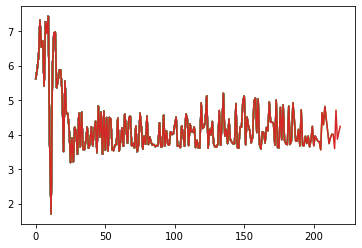

In [76]:
error=[]
accuracy=[]
for epoch in range(5):
    print("epoch",epoch)
    for i in tqdm(range(1,x_train.shape[0])):
        x_train_ind=np.expand_dims(x_train[i],axis=0)
        met=model.fit(np.asarray(x_train_ind).astype(np.float32),np.asarray(y_train[i]).astype(np.float32),batch_size=1,epochs=1)
        temp_pred=model.predict(x_train_ind)
        x_train_ind=np.expand_dims(x_train[i-1],axis=0)
        temp_pred_prev=model.predict(x_train_ind)
        print("prev :",     words[np.argmax(temp_pred_prev)],"now :",words[np.argmax(temp_pred_prev)],"word :" ,y_words_train[i])
        error.append(met.history['loss'])
        if(i%5==0):
            plt.plot(error)
        

In [21]:
#model.save("capstone-Model-cnn-V2-onehotencoding.h5")

In [22]:
np.array(ed.iloc[0][:-1])

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)

In [23]:
x_train_ind=np.expand_dims(x_train[0],axis=0)
pred=model.predict(x_train_ind)

In [24]:
x_train_pred=[]
for i in tqdm(range(x_train.shape[0])):
    x_train_ind=np.expand_dims(x_train[i],axis=0)
    pred=model.predict(x_train_ind)
    pred=words[np.argmax(pred)]
    x_train_pred.append(pred)
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 675/675 [39:45<00:00,  3.53s/it]


In [25]:
x_train_pred

['drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',


In [26]:
x_test_pred=[]

for i in tqdm(range(x_test.shape[0])):
    x_test_ind=np.expand_dims(x_test[i],axis=0)
    pred=model.predict(x_test_ind)
    pred=words[np.argmax(pred)]
    x_test_pred.append(pred)
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [07:49<00:00,  3.56s/it]


In [27]:
x_val_pred=[]

for i in tqdm(range(x_val.shape[0])):
    x_val_ind=np.expand_dims(x_val[i],axis=0)
    pred=model.predict(x_val_ind)
    pred=words[np.argmax(pred)]
    x_val_pred.append(pred)
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 158/158 [09:44<00:00,  3.70s/it]


In [28]:
x_val_pred=np.asarray(x_val_pred)
x_test_pred=np.asarray(x_test_pred)
x_train_pred=np.asarray(x_train_pred)

In [29]:
np.unique(x_train_pred)

array(['drink', 'hearing'], dtype='<U7')

In [30]:
y_words_train=np.asarray(y_words_train)
 

In [31]:
np.all([x_train_pred==y_words_train ,x_train_pred=='deaf'],axis=0).sum()/np.all([y_words_train=='deaf'],axis=0).sum()

0.0

In [32]:
np.all(x_train_pred==y_words_train , x_train_pred=='thin')

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
np.all(x_train_pred==y_words_train and x_train_pred=='thin').sum()/(x_train_pred=='thin').sum()

In [ ]:
(x_test_pred==y_words_test).sum()/x_test_pred.shape[0]*100

In [ ]:
(x_val_pred==y_words_val).sum()/x_val_pred.shape[0]*100